### Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Data summary 

In [4]:
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Deal with missing values (since there are only 2 missing values, drop the corresponding row containing missing value)

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### Drop duplicated rows

In [9]:
#screening_df = training data with no missing value#
screening_df = df.copy()
screening_df.drop_duplicates(inplace = True)


In [10]:
screening_df.shape

(10462, 11)

### Data type conversion


In [11]:
def change_to_datetime(col):
    screening_df[col] = pd.to_datetime(screening_df[col])

In [12]:
screening_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_to_datetime(i)

In [14]:
screening_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object


### Data standardization, extraction, conversion, and drop the unnecessary original column(s)
#### (change time/date related column to multiple single time unit entry column)

In [15]:
screening_df['journey_month'] = screening_df['Date_of_Journey'].dt.month
screening_df['journey_day'] = screening_df['Date_of_Journey'].dt.day

In [16]:
screening_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-02-23 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-23 05:50:00,2022-02-23 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-02-23 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-02-23 18:05:00,2022-02-23 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-02-23 16:50:00,2022-02-23 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [17]:
screening_df.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
screening_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-02-23 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-23 05:50:00,2022-02-23 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-02-23 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-02-23 18:05:00,2022-02-23 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-02-23 16:50:00,2022-02-23 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [19]:
def extract_hour(col):
    screening_df[col+'_hour'] = screening_df[col].dt.hour

def extract_min(col):
    screening_df[col+'_min'] = screening_df[col].dt.minute
    
for i in ['Dep_Time','Arrival_Time']:
    extract_hour(i)
    extract_min(i)

In [20]:
screening_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-02-23 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-23 05:50:00,2022-02-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-02-23 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-02-23 18:05:00,2022-02-23 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-02-23 16:50:00,2022-02-23 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
duration = list(screening_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
screening_df['Duration'] = duration

In [22]:
screening_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-02-23 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-23 05:50:00,2022-02-23 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-02-23 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-02-23 18:05:00,2022-02-23 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-02-23 16:50:00,2022-02-23 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
screening_df.drop('Dep_Time',axis = 1,inplace = True)
screening_df.drop('Arrival_Time',axis = 1,inplace = True)

In [24]:
screening_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

screening_df['Duration_hour'] = screening_df['Duration'].apply(hour) 
screening_df['Duration_min'] = screening_df['Duration'].apply(minute)


In [26]:
screening_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [27]:
screening_df['Duration_hour'] = screening_df['Duration_hour'].astype(int)
screening_df['Duration_min'] = screening_df['Duration_min'].astype(int)

In [28]:
screening_df.drop('Duration',axis = 1, inplace = True)

### Make sure data type of all numerical columns are changed to integer type

In [29]:
screening_df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_month         int64
journey_day           int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hour         int32
Duration_min          int32
dtype: object

### Deal with categorical columns 
#### i) Nominal data [ no hierarchy / order in data + not too much unique val]: 
#### Apply one-hot encoder to encode Airline, Source, Destination and Additional_Info columns

In [30]:
cat_col = [col for col in screening_df.columns if screening_df[col].dtype == 'O']

In [31]:
categorical = screening_df[cat_col]

In [32]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [33]:
categorical['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
cont_col=[col for col in screening_df.columns if screening_df[col].dtype != 'O']
cont_col

['Price',
 'journey_month',
 'journey_day',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hour',
 'Duration_min']

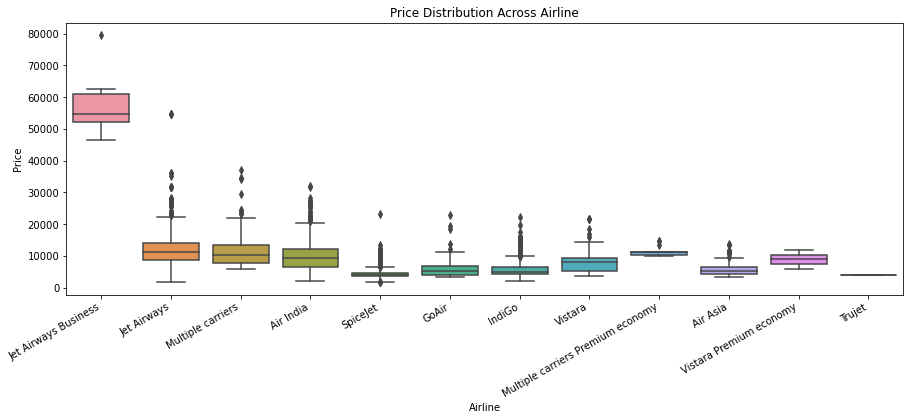

In [35]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = 'Airline',y = 'Price',data = screening_df.sort_values('Price',ascending = False))
plt.setp(ax.get_xticklabels(),rotation = 30,horizontalalignment = 'right')
plt.title('Price Distribution Across Airline')
plt.show()

In [36]:
Airline = pd.get_dummies(categorical['Airline'],drop_first = True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


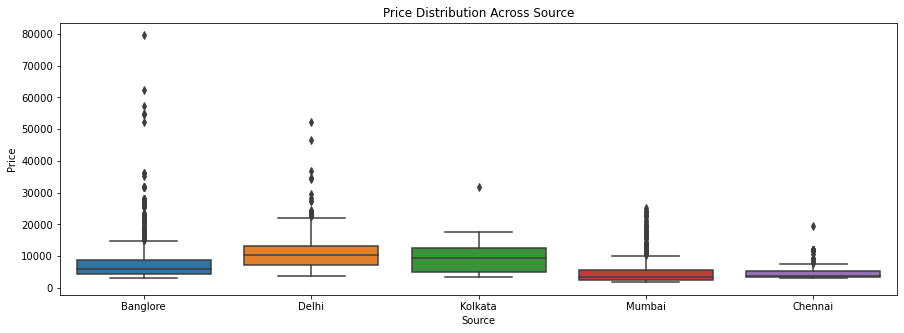

In [37]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Source',y = 'Price',data = screening_df.sort_values('Price',ascending = False))
plt.title('Price Distribution Across Source')
plt.show()

In [38]:
Source = pd.get_dummies(categorical['Source'],drop_first = True)

In [39]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [40]:
Source = Source.add_suffix('_S')

In [41]:
Source.head()

,Chennai_S,Delhi_S,Kolkata_S,Mumbai_S
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


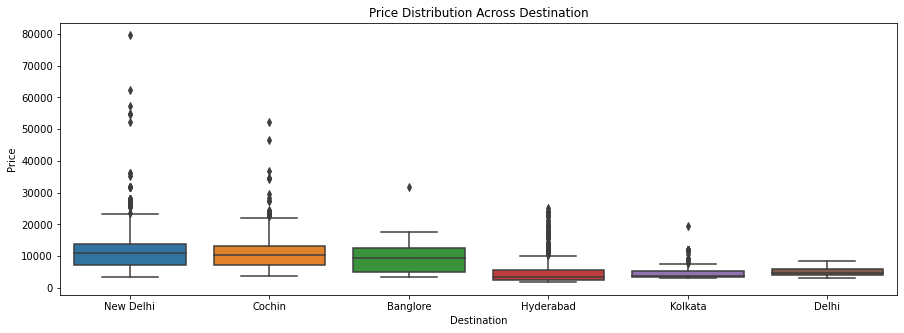

In [42]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Destination',y = 'Price',data = screening_df.sort_values('Price',ascending = False))
plt.title('Price Distribution Across Destination')
plt.show()

In [43]:
Destination = pd.get_dummies(categorical['Destination'],drop_first=True) #get (k-1) dummies out of k categories by removing the first level

In [44]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [45]:
Destination = Destination.add_suffix('_D') #since there are repeated column names, I added suffix to distinguish between them

In [46]:
Destination.head()

,Cochin_D,Delhi_D,Hyderabad_D,Kolkata_D,New Delhi_D
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
categorical.drop('Route',axis = 1,inplace = True) #route can be reflected through Total_Stops column

In [48]:
categorical['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [49]:
categorical['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

In [50]:
categorical['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [51]:
Extra_info = pd.get_dummies(categorical['Additional_Info'],drop_first = True)

#### ii) Ordinal data (hierarchy):customized label encoder applied to Total_Stops column

In [52]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [53]:
total_stop_dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops'] = categorical['Total_Stops'].map(total_stop_dict)
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,0,No Info
1,Air India,Kolkata,Banglore,2,No Info
2,Jet Airways,Delhi,Cochin,2,No Info
3,IndiGo,Kolkata,Banglore,1,No Info
4,IndiGo,Banglore,New Delhi,1,No Info


### Form train_df through combining categorical and continuous columns that have undergone preprocessing

In [54]:
train_df = pd.concat([categorical,Airline,Source,Destination,Extra_info,screening_df[cont_col]],axis = 1)
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,Red-eye flight,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No Info,0,0,1,0,0,...,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No Info,1,0,0,0,0,...,0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No Info,0,0,0,1,0,...,0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No Info,0,0,1,0,0,...,0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No Info,0,0,1,0,0,...,0,13302,1,3,16,50,21,35,4,45


In [55]:
train_df.drop('Airline', axis = 1, inplace = True)
train_df.drop('Source', axis = 1, inplace = True)
train_df.drop('Destination', axis = 1, inplace = True)
train_df.drop('Additional_Info',axis = 1,inplace = True) 

In [56]:
pd.set_option('display.max_columns',38) 
train_df.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai_S,Delhi_S,Kolkata_S,Mumbai_S,Cochin_D,Delhi_D,Hyderabad_D,Kolkata_D,New Delhi_D,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3897,3,24,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7662,1,5,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,13882,9,6,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6218,12,5,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13302,1,3,16,50,21,35,4,45


### Dealing with outlier

In [57]:
def plot_distribution(df,col):
    sns.boxplot(df[col])

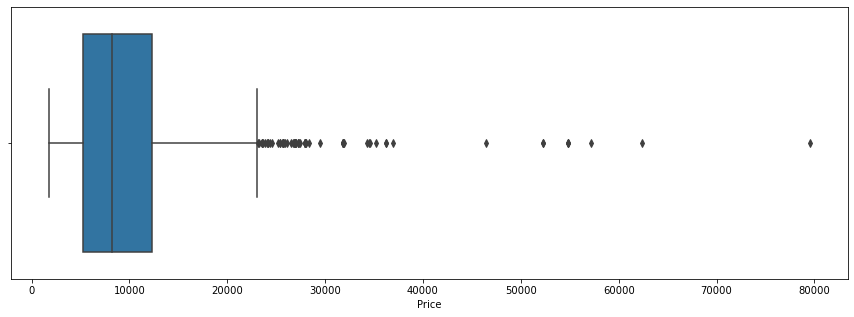

In [58]:
plt.figure(figsize = (15,5))
plot_distribution(train_df,'Price')

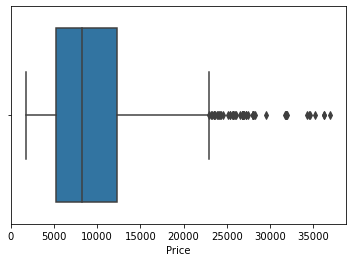

In [59]:
train_df['Price'] = np.where(train_df['Price'] >= 40000, train_df['Price'].median(), train_df['Price'])
plot_distribution(train_df,'Price')

### Separate independent and dependent feature (X and y)

In [60]:
X = train_df.drop('Price', axis = 1)
X.shape

(10462, 37)

In [61]:
y = train_df['Price']

### Split training and testing set and train different regressor models

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [63]:
X_train.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai_S,Delhi_S,Kolkata_S,Mumbai_S,Cochin_D,Delhi_D,Hyderabad_D,Kolkata_D,New Delhi_D,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,Red-eye flight,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
2005,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,5,27,22,50,12,35,13,45
2581,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,3,6,10,8,55,2,45
8210,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,5,21,10,9,20,12,10
8802,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,24,6,30,23,25,16,55
1191,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,18,9,35,9,45,24,10


In [64]:
from sklearn import metrics
import pickle

In [65]:
def predict(ml_model,dump,model_suffix):
    model = ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = ml_model.predict(X_test)
    print("Predictions are {}".format(predictions))
    
    r2_score = metrics.r2_score(y_test,predictions)
    print("r2 score: {}".format(r2_score))
    print("MSE:",metrics.mean_squared_error(y_test,predictions))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print("MAE:",metrics.mean_absolute_error(y_test,predictions))
    
    sns.distplot(y_test-predictions)
    if dump == 1:
        file = open('model%s.pkl'%model_suffix,'wb') #remember to change all \ to / for file location
        pickle.dump(model,file) #save model to a file

In [66]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


#### XGBRegressor

Training score: 0.9703598772159526
Predictions are [ 5815.9985 10279.003  13663.479  ...  7580.9307 12672.034  13628.681 ]
r2 score: 0.8976406348416862
MSE: 2042696.5796193196
RMSE: 1429.229365644059
MAE: 756.5572537760728


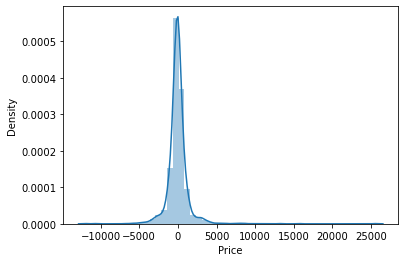

In [67]:
predict(XGBRegressor(),1,'XGB')

#### RandomForestRegressor

Training score: 0.983970802897566
Predictions are [ 6297.49  8309.53 13319.51 ...  7229.   12898.   13442.72]
r2 score: 0.8990061183812129
MSE: 2015446.8155024382
RMSE: 1419.66433198219
MAE: 668.5430390037843


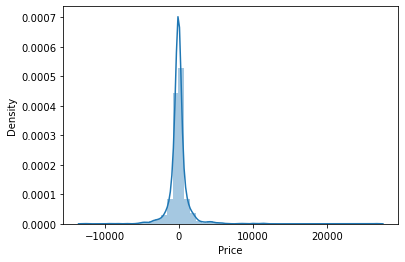

In [68]:
predict(RandomForestRegressor(),1,'RF')

#### LinearRegression

Training score: 0.6769940102301122
Predictions are [ 7084.73247577  6039.4629929  13576.65451161 ...  8558.81485578
  9297.37686005 12561.90809617]
r2 score: 0.6749564543990588
MSE: 6486610.558784327
RMSE: 2546.8825176643554
MAE: 1771.4807524289904


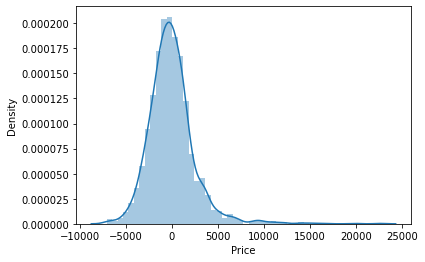

In [69]:
predict(LinearRegression(),1,'LR')

#### KNeighborsRegressor

Training score: 0.7444498545693399
Predictions are [ 6426.   8423.8 13236.4 ...  5740.8 11843.6 14808.8]
r2 score: 0.5898558834129475
MSE: 8184888.435050167
RMSE: 2860.9244021906916
MAE: 1868.6954610606783


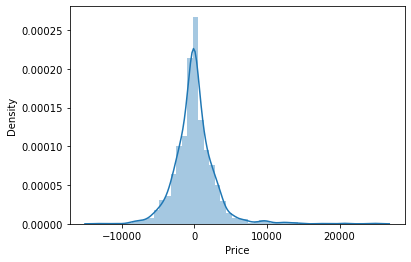

In [70]:
predict(KNeighborsRegressor(),1,'KNR')

#### DecisionTreeRegressor

Training score: 0.9960353428985893
Predictions are [ 6493.  9709. 14151. ...  7229. 12898. 13344.]
r2 score: 0.8386472778890358
MSE: 3219975.554347826
RMSE: 1794.4290329650337
MAE: 773.2391304347826


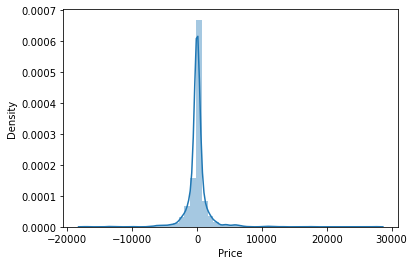

In [71]:
predict(DecisionTreeRegressor(),1,'DT')

### Given the performance metrics calculated above, XGBoost and Random Forest Regressor notably outperformed other regressor models like Linear Regressor, Decision Tree and K Neighbors Regressors. 
### With further testing and optimization (e.g. hyperparameter tuning), it is possible to adopt the models to predict flight ticket price in the region.